In [63]:
!pip install xgboost


In [64]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  accuracy_score, f1_score, precision_score,confusion_matrix, recall_score, roc_auc_score
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [65]:
df = pd.read_csv('diabetes_data_upload.csv')
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [66]:
df.isna().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

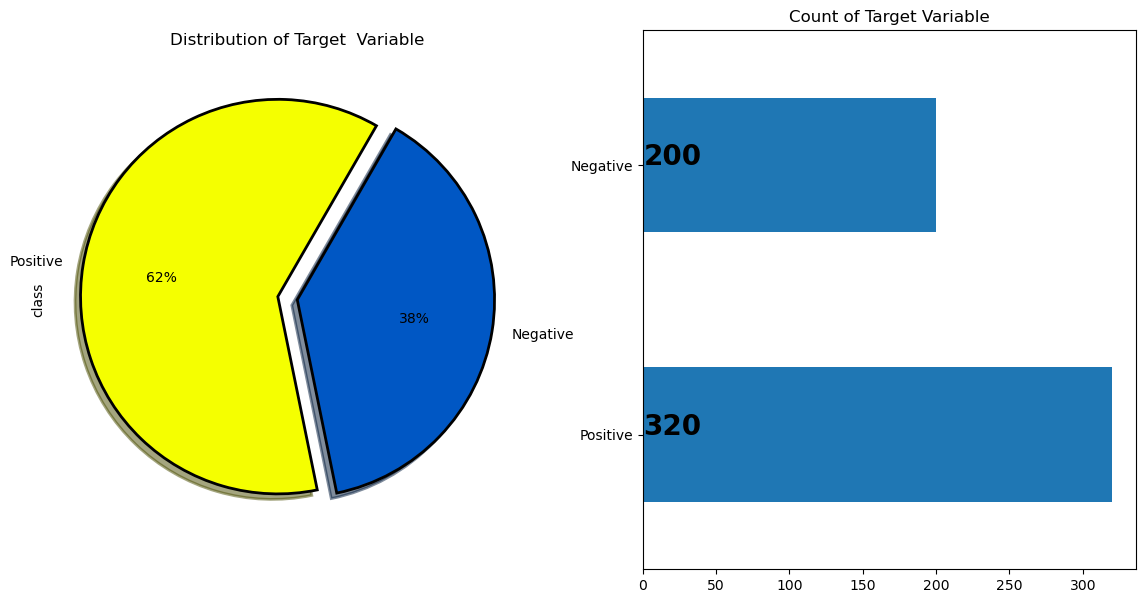

In [68]:
# plotting to create pie chart and bar plot as subplots
plt.figure(figsize=(14,7))
plt.subplot(121)
df["class"].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("prism",7),startangle = 60,labels=["Positive","Negative"],
wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.1,0],shadow =True)
plt.title("Distribution of Target  Variable")

plt.subplot(122)
ax = df["class"].value_counts().plot(kind="barh")

for i,j in enumerate(df["class"].value_counts().values):
    ax.text(.7,i,j,weight = "bold",fontsize=20)

plt.title("Count of Target Variable")
plt.show()

In [69]:
import seaborn as sns
import pandas as pd


class,Negative,Positive
Gender,,
Female,9.500000,54.062500
Male,90.500000,45.937500


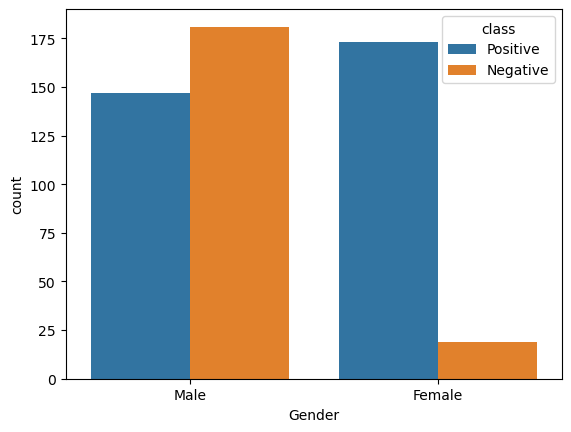

In [70]:
# Distribution of Gender using countplot
sns.countplot(x='Gender', hue='class', data=df)

# Crosstabulation for the distribution of Gender with respect to 'class'
plot_criteria = ['Gender', 'class']
cm = sns.light_palette("red", as_cmap=True)
crosstab = pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100
crosstab_styled = crosstab.style.background_gradient(cmap=cm)
crosstab_styled

class,Negative,Positive
Polydipsia,,
No,96.000000,29.690000
Yes,4.000000,70.310000


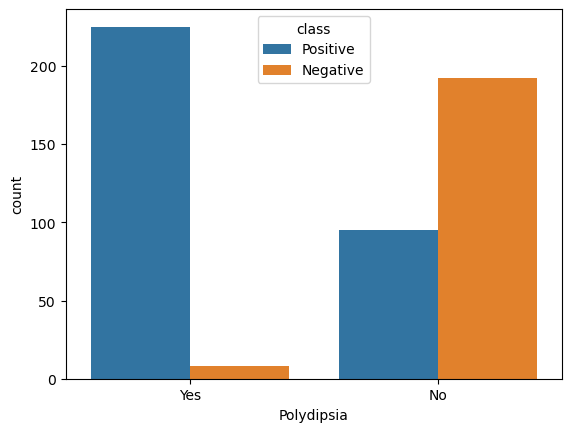

In [71]:
# Distribution of Polydipsia using countplot
sns.countplot(x='Polydipsia', hue='class', data=df)

# Crosstabulation for the distribution of Polydipsia with respect to 'class'
plot_criteria = ['Polydipsia', 'class']
cm = sns.light_palette("red", as_cmap=True)
crosstab = pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100
crosstab_rounded = round(crosstab, 2)  # Round the values to two decimal places
crosstab_styled = crosstab_rounded.style.background_gradient(cmap=cm)
crosstab_styled

class,Negative,Positive
Polyuria,,
No,92.500000,24.060000
Yes,7.500000,75.940000


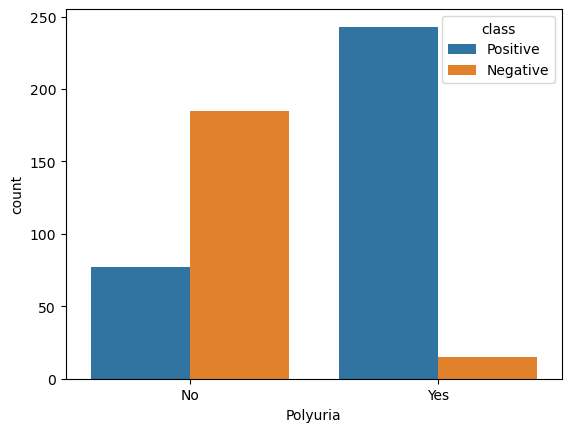

In [72]:
# Distribution of Polyuria using countplot
sns.countplot(x='Polyuria', hue='class', data=df)

# Crosstabulation for the distribution of Polyuria with respect to 'class'
plot_criteria = ['Polyuria', 'class']
cm = sns.light_palette("red", as_cmap=True)
crosstab = pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100
crosstab_rounded = round(crosstab, 2)  # Round the values to two decimal places
crosstab_styled = crosstab_rounded.style.background_gradient(cmap=cm)
crosstab_styled

class,Negative,Positive
sudden weight loss,,
No,85.500000,41.250000
Yes,14.500000,58.750000


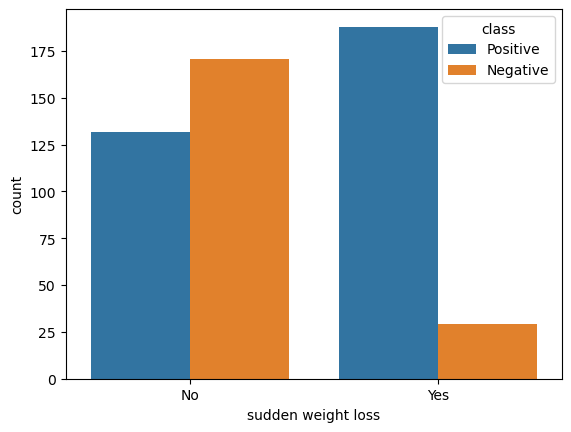

In [73]:

# Distribution of sudden weight loss using countplot
sns.countplot(x='sudden weight loss', hue='class', data=df)

# Crosstabulation for the distribution of sudden weight loss with respect to 'class'
plot_criteria = ['sudden weight loss', 'class']
cm = sns.light_palette("red", as_cmap=True)
crosstab = pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100
crosstab_rounded = round(crosstab, 2)  # Round the values to two decimal places
crosstab_styled = crosstab_rounded.style.background_gradient(cmap=cm)
crosstab_styled

class,Negative,Positive
weakness,,
No,56.500000,31.870000
Yes,43.500000,68.120000


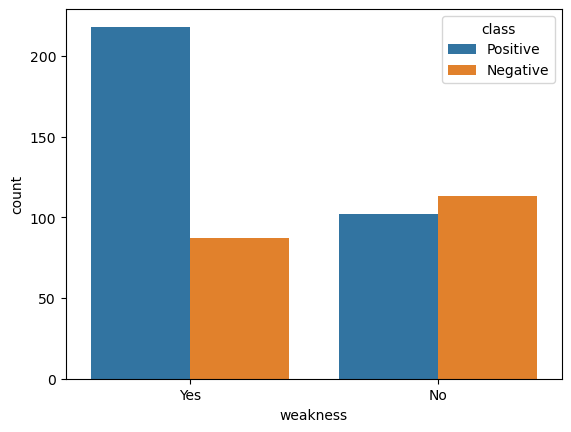

In [74]:
# Distribution of weakness
sns.countplot(x='weakness',hue='class', data=df)


plot_criteria= ['weakness', 'class']
cm = sns.light_palette("red", as_cmap=True)
crosstab = pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100
crosstab_rounded = round(crosstab, 2)  # Round the values to two decimal places
crosstab_styled = crosstab_rounded.style.background_gradient(cmap=cm)
crosstab_styled

In [75]:
import seaborn as sns
import pandas as pd

In [76]:
import seaborn as sns
import pandas as pd

In [77]:
!pip install seaborn

class,Negative,Positive
Polyphagia,,
No,76.000000,40.940000
Yes,24.000000,59.060000


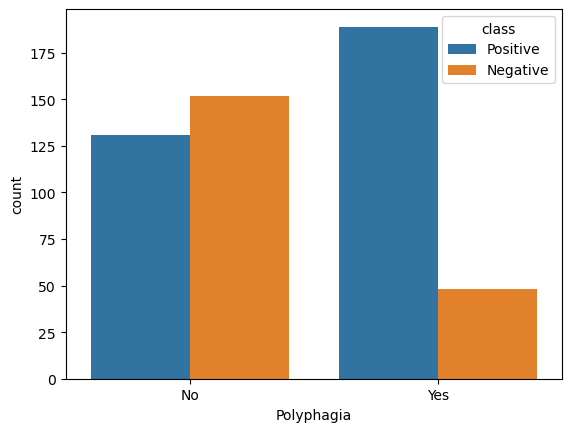

In [78]:
# Distribution of Polyphagia using countplot
sns.countplot(x='Polyphagia', hue='class', data=df)

# Crosstabulation for the distribution of Polyphagia with respect to 'class'
plot_criteria = ['Polyphagia', 'class']
cm = sns.light_palette("red", as_cmap=True)
crosstab = pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100
crosstab_rounded = round(crosstab, 2)  # Round the values to two decimal places
crosstab_styled = crosstab_rounded.style.background_gradient(cmap=cm)
crosstab_styled

class,Negative,Positive
Genital thrush,,
No,83.500000,74.060000
Yes,16.500000,25.940000


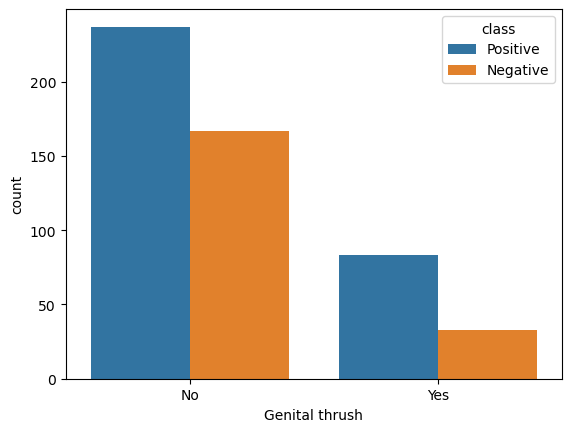

In [79]:
# Distribution of Genital thrush using countplot
sns.countplot(x='Genital thrush', hue='class', data=df)

# Crosstabulation for the distribution of Genital thrush with respect to 'class'
plot_criteria = ['Genital thrush', 'class']
cm = sns.light_palette("red", as_cmap=True)
crosstab = pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100
crosstab_rounded = round(crosstab, 2)  # Round the values to two decimal places
crosstab_styled = crosstab_rounded.style.background_gradient(cmap=cm)
crosstab_styled

class,Negative,Positive
Genital thrush,,
No,83.500000,74.060000
Yes,16.500000,25.940000


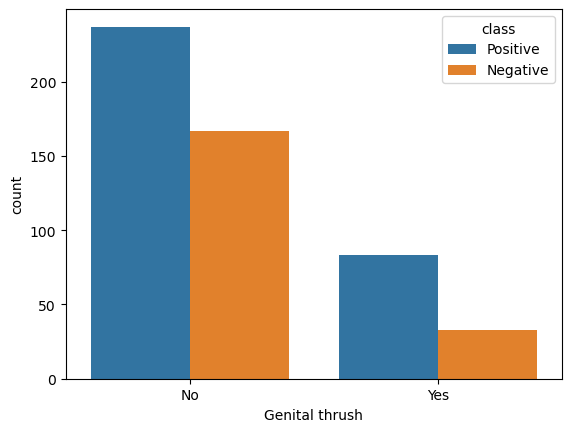

In [80]:
import seaborn as sns
import pandas as pd

# Distribution of Genital thrush using countplot
sns.countplot(x='Genital thrush', hue='class', data=df)

# Crosstabulation for the distribution of Genital thrush with respect to 'class'
plot_criteria = ['Genital thrush', 'class']
cm = sns.light_palette("red", as_cmap=True)
crosstab = pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100
crosstab_rounded = round(crosstab, 2)  # Round the values to two decimal places
crosstab_styled = crosstab_rounded.style.background_gradient(cmap=cm)
crosstab_styled

In [81]:
import pandas as pd

# Load the dataset into a DataFrame
df = pd.read_csv('diabetes_data_upload.csv')

class,Negative,Positive
Polyphagia,,
No,76.000000,40.940000
Yes,24.000000,59.060000


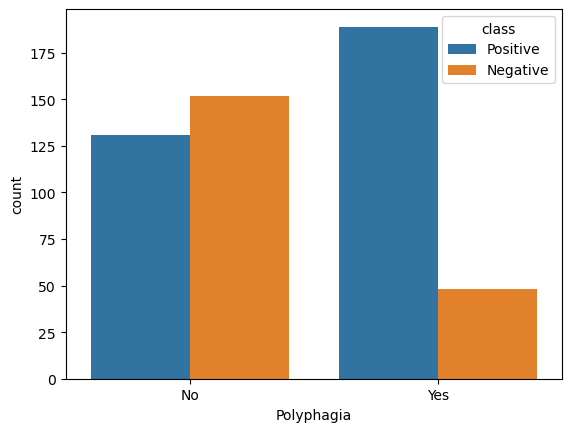

In [82]:
# Distribution of Polyphagia using countplot
sns.countplot(x='Polyphagia', hue='class', data=df)

# Crosstabulation for the distribution of Polyphagia with respect to 'class'
plot_criteria = ['Polyphagia', 'class']
cm = sns.light_palette("red", as_cmap=True)
crosstab = pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100
crosstab_rounded = round(crosstab, 2)  # Round the values to two decimal places
crosstab_styled = crosstab_rounded.style.background_gradient(cmap=cm)
crosstab_styled

class,Negative,Positive
Genital thrush,,
No,83.500000,74.060000
Yes,16.500000,25.940000


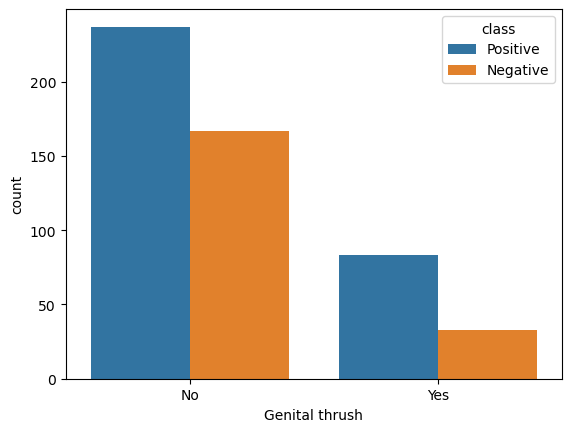

In [83]:
import seaborn as sns
import pandas as pd

# Distribution of Genital thrush using countplot
sns.countplot(x='Genital thrush', hue='class', data=df)

# Crosstabulation for the distribution of Genital thrush with respect to 'class'
plot_criteria = ['Genital thrush', 'class']
cm = sns.light_palette("red", as_cmap=True)
crosstab = pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100
crosstab_rounded = round(crosstab, 2)  # Round the values to two decimal places
crosstab_styled = crosstab_rounded.style.background_gradient(cmap=cm)
crosstab_styled

class,Negative,Positive
visual blurring,,
No,71.000000,45.310000
Yes,29.000000,54.690000


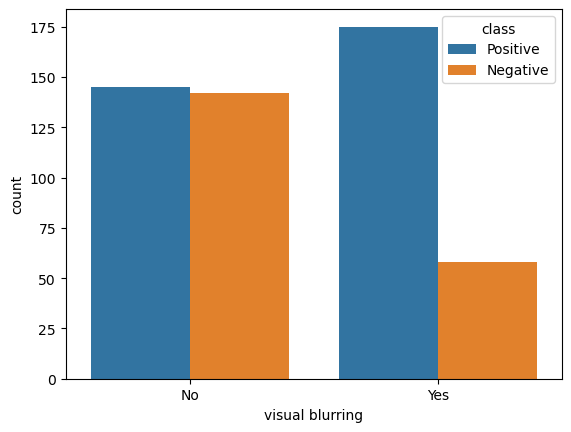

In [84]:
import seaborn as sns
import pandas as pd

# Distribution of visual blurring using countplot
sns.countplot(x='visual blurring', hue='class', data=df)

# Crosstabulation for the distribution of visual blurring with respect to 'class'
plot_criteria = ['visual blurring', 'class']
cm = sns.light_palette("red", as_cmap=True)
crosstab = pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100
crosstab_rounded = round(crosstab, 2)  # Round the values to two decimal places
crosstab_styled = crosstab_rounded.style.background_gradient(cmap=cm)
crosstab_styled

class,Negative,Positive
Itching,,
No,50.500000,51.880000
Yes,49.500000,48.120000


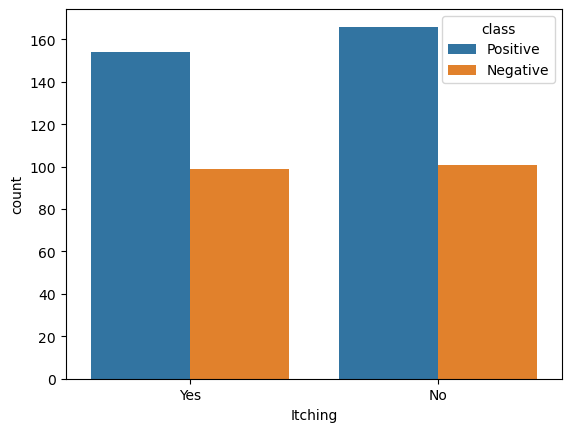

In [85]:
# Distribution of Itching using countplot
sns.countplot(x='Itching', hue='class', data=df)

# Crosstabulation for the distribution of Itching with respect to 'class'
plot_criteria = ['Itching', 'class']
cm = sns.light_palette("red", as_cmap=True)
crosstab = pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100
crosstab_rounded = round(crosstab, 2)  # Round the values to two decimal places
crosstab_styled = crosstab_rounded.style.background_gradient(cmap=cm)
crosstab_styled

class,Negative,Positive
Irritability,,
No,92.000000,65.620000
Yes,8.000000,34.380000


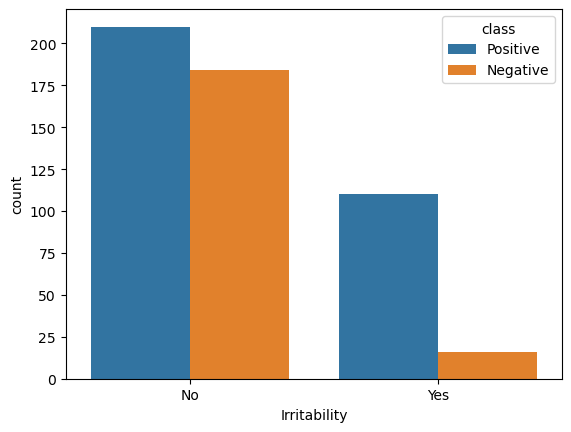

In [86]:
# Distribution of Irritability using countplot
sns.countplot(x='Irritability', hue='class', data=df)

# Crosstabulation for the distribution of Irritability with respect to 'class'
plot_criteria = ['Irritability', 'class']
cm = sns.light_palette("red", as_cmap=True)
crosstab = pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100
crosstab_rounded = round(crosstab, 2)  # Round the values to two decimal places
crosstab_styled = crosstab_rounded.style.background_gradient(cmap=cm)
crosstab_styled

class,Negative,Positive
delayed healing,,
No,57.000000,52.190000
Yes,43.000000,47.810000


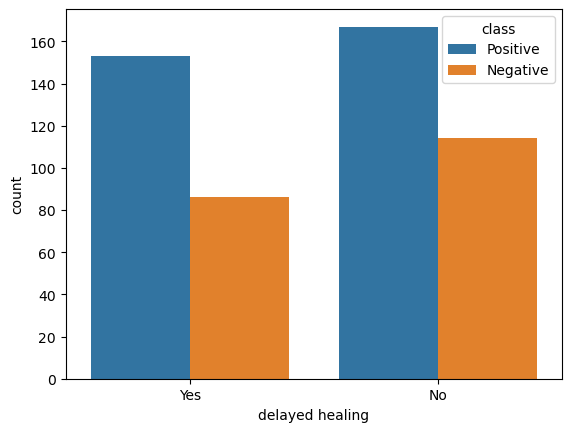

In [87]:
# Distribution of delayed healing using countplot
sns.countplot(x='delayed healing', hue='class', data=df)

# Crosstabulation for the distribution of delayed healing with respect to 'class'
plot_criteria = ['delayed healing', 'class']
cm = sns.light_palette("red", as_cmap=True)
crosstab = pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100
crosstab_rounded = round(crosstab, 2)  # Round the values to two decimal places
crosstab_styled = crosstab_rounded.style.background_gradient(cmap=cm)
crosstab_styled

class,Negative,Positive
partial paresis,,
No,84.000000,40.000000
Yes,16.000000,60.000000


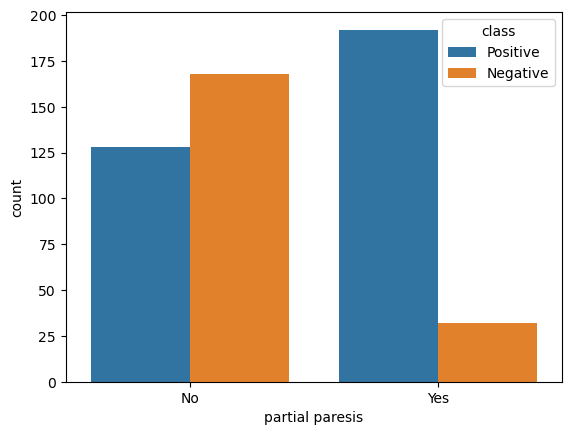

In [88]:
# Distribution of partial paresis using countplot
sns.countplot(x='partial paresis', hue='class', data=df)

# Crosstabulation for the distribution of partial paresis with respect to 'class'
plot_criteria = ['partial paresis', 'class']
cm = sns.light_palette("red", as_cmap=True)
crosstab = pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100
crosstab_rounded = round(crosstab, 2)  # Round the values to two decimal places
crosstab_styled = crosstab_rounded.style.background_gradient(cmap=cm)
crosstab_styled

class,Negative,Positive
muscle stiffness,,
No,70.000000,57.810000
Yes,30.000000,42.190000


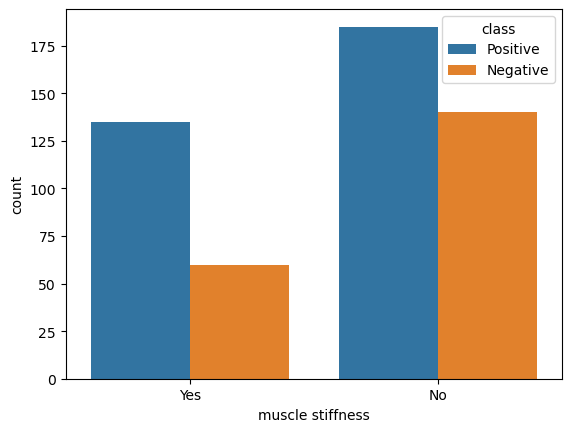

In [89]:
# Distribution of muscle stiffness using countplot
sns.countplot(x='muscle stiffness', hue='class', data=df)

# Crosstabulation for the distribution of muscle stiffness with respect to 'class'
plot_criteria = ['muscle stiffness', 'class']
cm = sns.light_palette("red", as_cmap=True)
crosstab = pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100
crosstab_rounded = round(crosstab, 2)  # Round the values to two decimal places
crosstab_styled = crosstab_rounded.style.background_gradient(cmap=cm)
crosstab_styled

class,Negative,Positive
Alopecia,,
No,49.500000,75.620000
Yes,50.500000,24.380000


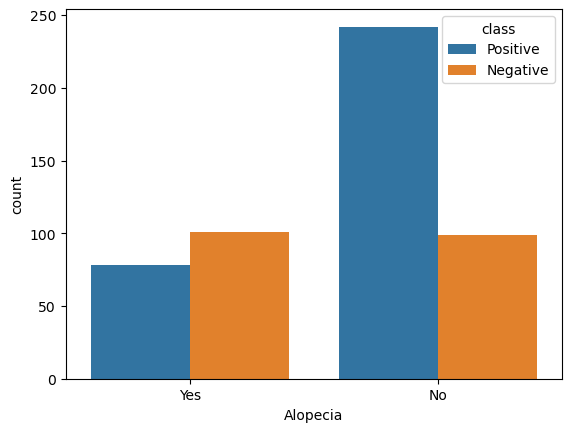

In [90]:
# Distribution of Alopecia using countplot
sns.countplot(x='Alopecia', hue='class', data=df)

# Crosstabulation for the distribution of Alopecia with respect to 'class'
plot_criteria = ['Alopecia', 'class']
cm = sns.light_palette("red", as_cmap=True)
crosstab = pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100
crosstab_rounded = round(crosstab, 2)  # Round the values to two decimal places
crosstab_styled = crosstab_rounded.style.background_gradient(cmap=cm)
crosstab_styled

class,Negative,Positive
Obesity,,
No,86.500000,80.940000
Yes,13.500000,19.060000


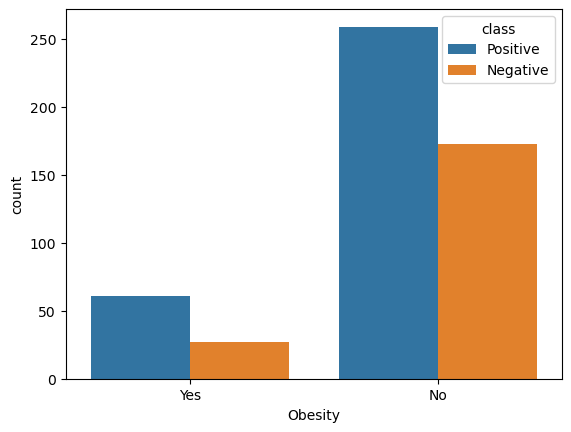

In [91]:
# Distribution of Obesity using countplot
sns.countplot(x='Obesity', hue='class', data=df)

# Crosstabulation for the distribution of Obesity with respect to 'class'
plot_criteria = ['Obesity', 'class']
cm = sns.light_palette("red", as_cmap=True)
crosstab = pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100
crosstab_rounded = round(crosstab, 2)  # Round the values to two decimal places
crosstab_styled = crosstab_rounded.style.background_gradient(cmap=cm)
crosstab_styled

In [92]:
# Function for Pie Plot
def plotPie(value, title, label):
    plt.figure(figsize=(4,4))
    plt.pie(
        value.value_counts(),
        startangle=90,
        labels = label,
        autopct=(lambda p:f'{p:.2f}%\n{p*sum(value.value_counts())/100 :.0f} items')
    )
    plt.title(title)
    plt.show()

<Figure size 500x500 with 0 Axes>

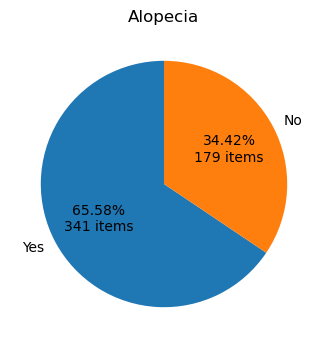

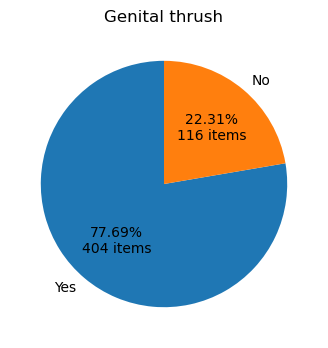

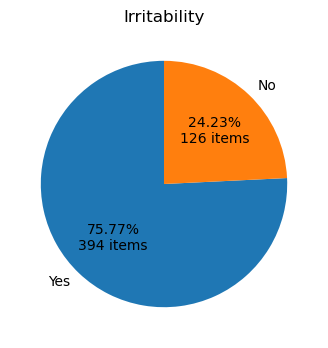

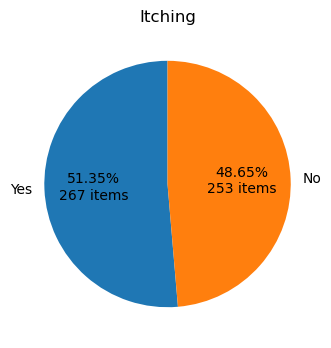

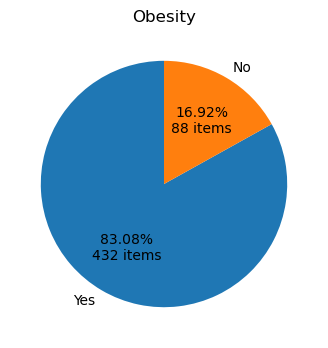

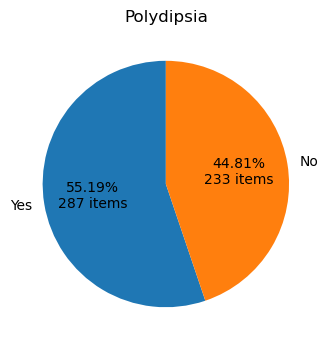

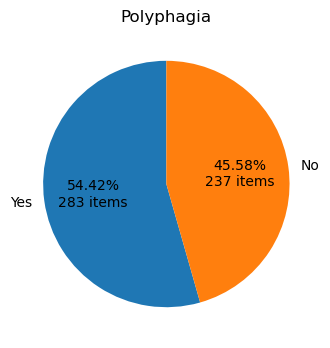

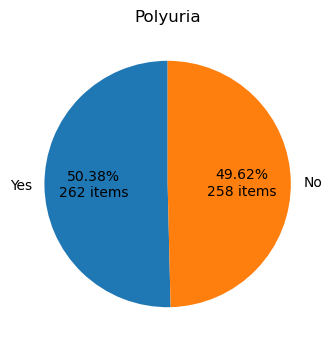

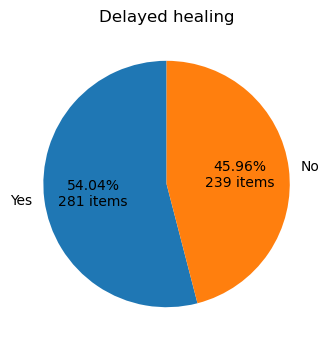

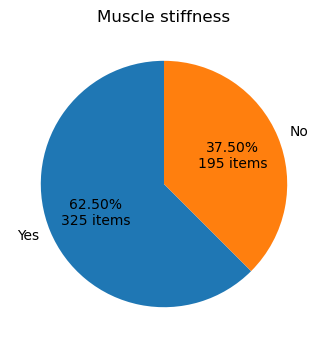

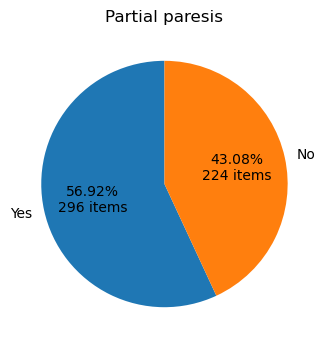

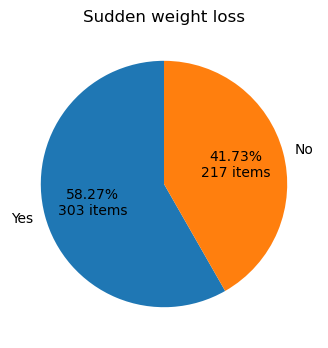

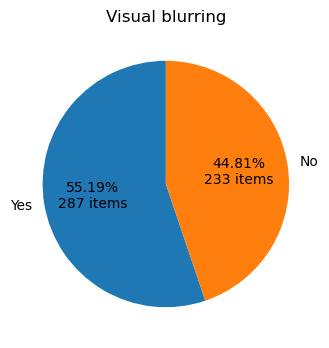

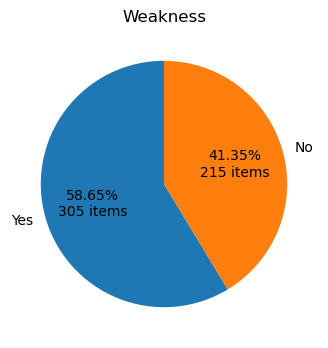

In [93]:
df_symptoms = df[df.columns.difference(["Age", "class", "Gender"])]
plt.figure(figsize=(5,5))

for column in df_symptoms.columns:
    plotPie(df_symptoms[column], column.capitalize(), ["Yes", "No"])

In [94]:
import matplotlib.pyplot as plt

<Figure size 500x500 with 0 Axes>

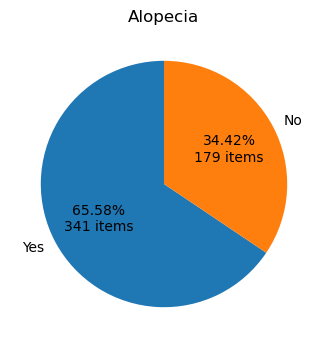

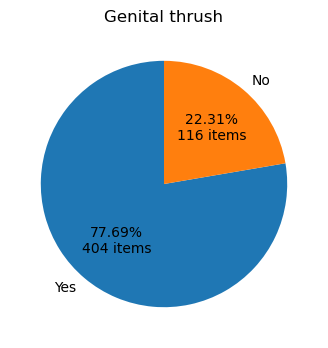

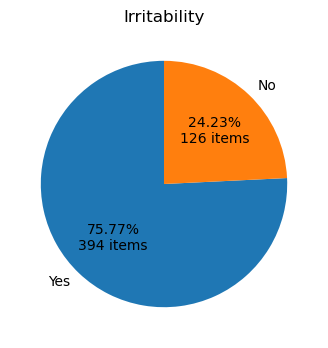

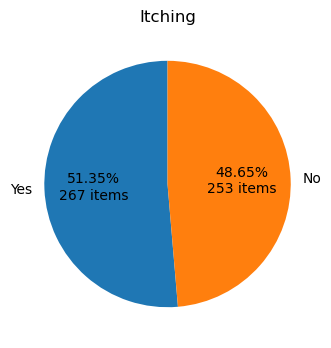

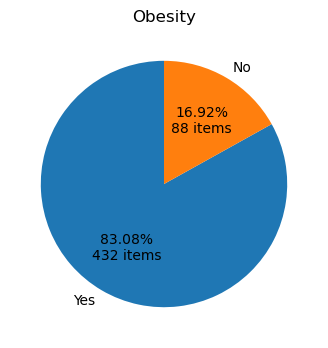

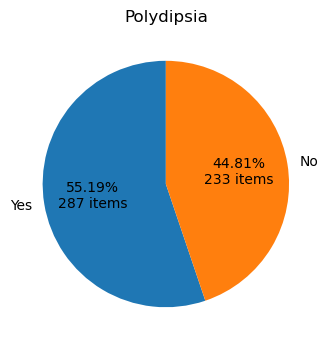

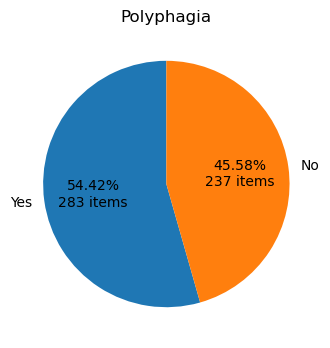

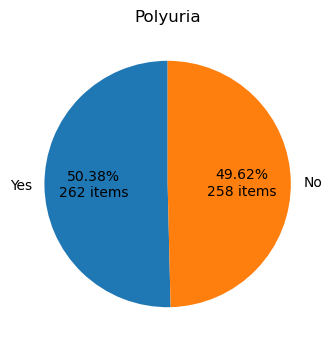

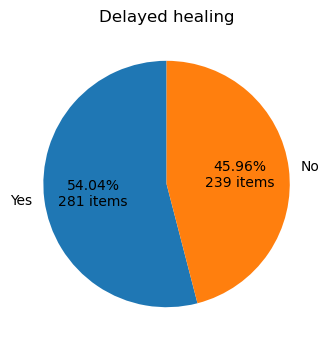

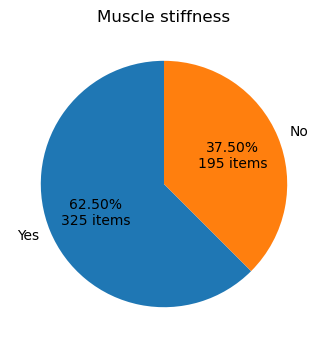

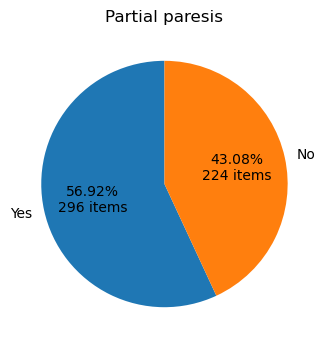

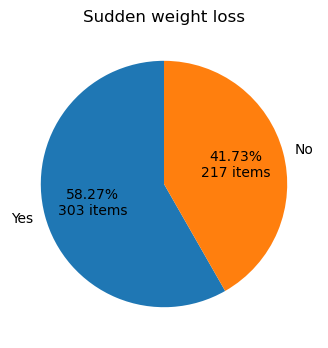

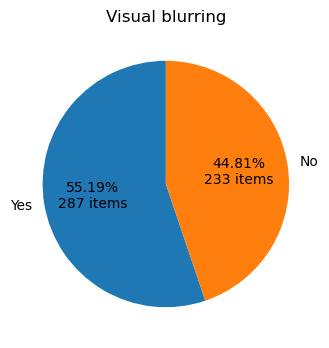

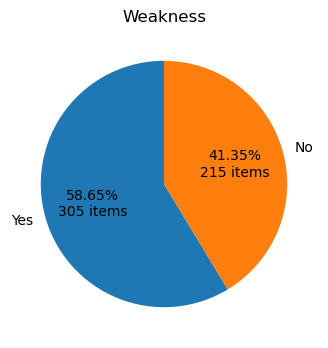

In [95]:
df_symptoms = df[df.columns.difference(["Age", "class", "Gender"])]
plt.figure(figsize=(5,5))

for column in df_symptoms.columns:
    plotPie(df_symptoms[column], column.capitalize(), ["Yes", "No"])

In [96]:
# Changing Postive to 1 and Negative to 0
df['class'] = df['class'].apply(lambda x: 0 if x=='Negative' else 1)
df['class'].head()

0    1
1    1
2    1
3    1
4    1
Name: class, dtype: int64

In [97]:
# Separating Target feature
X = df.drop(['class'], axis=1)
y = df['class']

In [98]:
# Storing Features
objectList = X.select_dtypes(include = "object").columns
print(objectList)

Index(['Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness',
       'Polyphagia', 'Genital thrush', 'visual blurring', 'Itching',
       'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity'],
      dtype='object')


In [99]:
#Label Encoding for object to numeric conversion
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feature in objectList:
    X[feature] = le.fit_transform(X[feature].astype(str))

print (X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Age                 520 non-null    int64
 1   Gender              520 non-null    int32
 2   Polyuria            520 non-null    int32
 3   Polydipsia          520 non-null    int32
 4   sudden weight loss  520 non-null    int32
 5   weakness            520 non-null    int32
 6   Polyphagia          520 non-null    int32
 7   Genital thrush      520 non-null    int32
 8   visual blurring     520 non-null    int32
 9   Itching             520 non-null    int32
 10  Irritability        520 non-null    int32
 11  delayed healing     520 non-null    int32
 12  partial paresis     520 non-null    int32
 13  muscle stiffness    520 non-null    int32
 14  Alopecia            520 non-null    int32
 15  Obesity             520 non-null    int32
dtypes: int32(15), int64(1)
memory usage: 34.7 KB

In [100]:
X.head(5)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1


In [101]:
X.corrwith(y)

Age                   0.108679
Gender               -0.449233
Polyuria              0.665922
Polydipsia            0.648734
sudden weight loss    0.436568
weakness              0.243275
Polyphagia            0.342504
Genital thrush        0.110288
visual blurring       0.251300
Itching              -0.013384
Irritability          0.299467
delayed healing       0.046980
partial paresis       0.432288
muscle stiffness      0.122474
Alopecia             -0.267512
Obesity               0.072173
dtype: float64

<Axes: title={'center': 'Correlation with Diabetes'}>

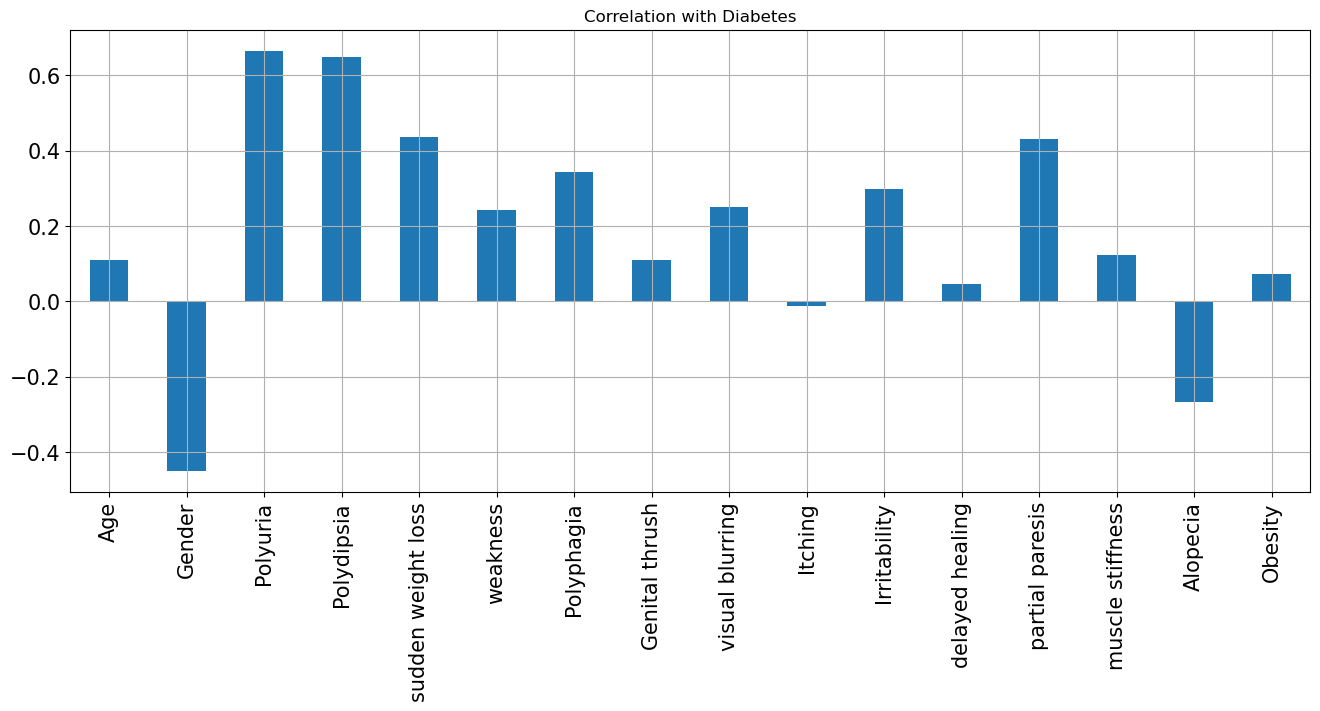

In [102]:
#Correlation with Response Variable class

X.corrwith(y).plot.bar(
        figsize = (16, 6), title = "Correlation with Diabetes", fontsize = 15,
        rot = 90, grid = True)

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,stratify=y, random_state = 12345)

In [104]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,stratify=y, random_state = 12345)

In [105]:
## checking distribution of target variable in train test split
print('Distribution of target variable in training set')
print(y_train.value_counts())

print('Distribution of target variable in test set')
print(y_test.value_counts())

Distribution of target variable in training set
1    256
0    160
Name: class, dtype: int64
Distribution of target variable in test set
1    64
0    40
Name: class, dtype: int64


In [106]:
minmax = MinMaxScaler()
X_train[['Age']] = minmax.fit_transform(X_train[['Age']])
X_test[['Age']] = minmax.transform(X_test[['Age']])

In [107]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
X_train[['Age']] = minmax.fit_transform(X_train[['Age']])
X_test[['Age']] = minmax.transform(X_test[['Age']])

In [108]:
X_train.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
515,0.310811,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0
169,0.513514,1,1,1,1,1,0,0,1,1,1,1,1,1,0,0
122,0.324324,1,0,1,0,1,1,0,0,1,1,1,1,1,0,1
278,0.297297,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
188,0.729730,1,1,0,1,1,1,1,0,0,1,1,1,1,1,0


In [109]:
X.columns

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity'],
      dtype='object')

In [110]:
X.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1


In [111]:
X_FS = X[['Polyuria', 'Polydipsia','Age', 'Gender','partial paresis','sudden weight loss','Irritability', 'delayed healing','Alopecia','Itching']]

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X_FS, y, test_size = 0.2, stratify=y, random_state = 12345)

In [113]:
minmax = MinMaxScaler()
X_train[['Age']] = minmax.fit_transform(X_train[['Age']])
X_test[['Age']] = minmax.transform(X_test[['Age']])

In [114]:
# Logistic Regression
logi = LogisticRegression(random_state = 0, penalty = 'l2')
logi.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [115]:
from sklearn.linear_model import LogisticRegression

logi = LogisticRegression(random_state=0, penalty='l2')
logi.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [116]:
# Cross Validation
from sklearn import model_selection
kfold = model_selection.KFold(n_splits=10, random_state=7)
scoring = 'accuracy'

acc_logi = cross_val_score(estimator = logi, X = X_train, y = y_train, cv = kfold,scoring=scoring)
acc_logi.mean()

ValueError: Setting a random_state has no effect since shuffle is False. You should leave random_state to its default (None), or set shuffle=True.

In [ ]:
from sklearn import model_selection

# Set shuffle=True or remove random_state parameter
kfold = model_selection.KFold(n_splits=10, shuffle=True)
scoring = 'accuracy'

acc_logi = cross_val_score(estimator=logi, X=X_train, y=y_train, cv=kfold, scoring=scoring)
acc_logi.mean()

In [ ]:
from sklearn.model_selection import cross_val_score

# Set shuffle=True or remove random_state parameter
kfold = model_selection.KFold(n_splits=10, shuffle=True)
scoring = 'accuracy'

acc_logi = cross_val_score(estimator=logi, X=X_train, y=y_train, cv=kfold, scoring=scoring)
acc_logi.mean()


In [ ]:
# Model Evaluation
y_predict_logi = logi.predict(X_test)
acc = accuracy_score(y_test, y_predict_logi)
roc = roc_auc_score(y_test, y_predict_logi)
prec = precision_score(y_test, y_predict_logi)
rec = recall_score(y_test, y_predict_logi)
f1 = f1_score(y_test, y_predict_logi)

results = pd.DataFrame([['Logistic Regression',acc, acc_logi.mean(), prec, rec, f1,roc]], columns = ['Model', 'Accuracy','Cross Val Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
import pandas as pd

# Calculate predictions using the logistic regression model
y_predict_logi = logi.predict(X_test)

# Calculate evaluation metrics
acc = accuracy_score(y_test, y_predict_logi)
roc = roc_auc_score(y_test, y_predict_logi)
prec = precision_score(y_test, y_predict_logi)
rec = recall_score(y_test, y_predict_logi)
f1 = f1_score(y_test, y_predict_logi)

# Create a DataFrame to store the results
results = pd.DataFrame([['Logistic Regression', acc, acc_logi.mean(), prec, rec, f1, roc]],
                       columns=['Model', 'Accuracy', 'Cross Val Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC'])
results


In [ ]:
# Random Forest
rf = RandomForestClassifier(criterion='gini',n_estimators=100)
rf.fit(X_train,y_train)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier with specified parameters
rf = RandomForestClassifier(criterion='gini', n_estimators=100)

# Fit the Random Forest classifier to the training data
rf.fit(X_train, y_train)

In [ ]:
# Cross Validation
kfold = model_selection.KFold(n_splits=10, random_state=7)
scoring = 'accuracy'

acc_rf = cross_val_score(estimator = rf, X = X_train, y = y_train, cv = kfold,scoring=scoring)
acc_rf.mean()

In [ ]:
from sklearn import model_selection

# Set shuffle=True or remove random_state parameter
kfold = model_selection.KFold(n_splits=10, shuffle=True)
scoring = 'accuracy'

acc_rf = cross_val_score(estimator=rf, X=X_train, y=y_train, cv=kfold, scoring=scoring)
acc_rf.mean()

In [ ]:
# Model Evaluation
y_predict_r = rf.predict(X_test)
roc=roc_auc_score(y_test, y_predict_r)
acc = accuracy_score(y_test, y_predict_r)
prec = precision_score(y_test, y_predict_r)
rec = recall_score(y_test, y_predict_r)
f1 = f1_score(y_test, y_predict_r)

model_results = pd.DataFrame([['Random Forest',acc, acc_rf.mean(),prec,rec, f1,roc]], columns = ['Model', 'Accuracy','Cross Val Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])

results = results.append(model_results, ignore_index = True)
results

In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt

plt.figure()

# Add the models to the list that you want to view on the ROC plot
models = [
{
    'label': 'Logistic Regression',
    'model': LogisticRegression(random_state = 0, penalty = 'l2'),
},

    {
    'label': 'Random Forest',
    'model': RandomForestClassifier(n_estimators = 100,criterion='gini', random_state = 47),
},
    
]

In [ ]:
# Below for loop iterates through your models list
for m in models:
    model = m['model']
    model.fit(X_train, y_train)
    y_pred=model.predict(X_test)
    
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
    
# Calculate Area under the curve to display on the plot
    auc = metrics.roc_auc_score(y_test,model.predict(X_test))
    
# Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))
    
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()